In [ ]:
# Import the dependencies
from keras.models import Sequential # Initialize ANN
from keras.layers import Dense # Tell us the number of layers, neurons
from sklearn.model_selection import train_test_split # To split the data into training and testing sets
from sklearn.preprocessing import MinMaxScaler # To scale the data
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload() # Upload the data
df = pd.read_csv('test.csv') # Load the data
df.head(7) # Print the first 7 rows of data

Saving test.csv to test.csv


,dev_quality,dev_on_time,team_chemistry,dev_exp,pro_exp,accomplishment
0,72,63,59,58,79,1
1,83,25,75,61,59,1
2,66,55,81,79,55,1
3,23,68,53,49,34,0
4,18,72,66,90,35,1
5,25,60,26,82,86,1
6,56,16,67,28,33,0


In [ ]:
# Convert the data into an array
dataset = df.values
dataset

array([[72, 63, 59, 58, 79,  1],
       [83, 25, 75, 61, 59,  1],
       [66, 55, 81, 79, 55,  1],
       ...,
       [13, 25, 20, 33, 21,  1],
       [35, 39, 27, 35, 50,  0],
       [36, 85, 36, 34, 32,  1]])

In [ ]:
# Split the dataset into independent and dependent datasets
X = dataset[:, 0:5] # Get all the rows from the columns [0, 5)

Y = dataset[:, 5] # Get all the rows from columns at position 5 (the 6th column)


In [ ]:
# Use the min-max scaler method from preprocesing which scales the dataset so that all
# the features lie between 0 and 1 inclusive
min_max_scaler = MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.775 , 0.6625, 0.6125, 0.6   , 0.8625],
       [0.9125, 0.1875, 0.8125, 0.6375, 0.6125],
       [0.7   , 0.5625, 0.8875, 0.8625, 0.5625],
       ...,
       [0.0375, 0.1875, 0.125 , 0.2875, 0.1375],
       [0.3125, 0.3625, 0.2125, 0.3125, 0.5   ],
       [0.325 , 0.9375, 0.325 , 0.3   , 0.275 ]])

In [ ]:
# Split the data into 80% training and 20% (testing(10%) and validating(10%) )
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
# The training set has 1600 data points while he validation and test set have 200 data points each.
# The X variables have 42 input features
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(799, 5) (100, 5) (100, 5) (799,) (100,) (100,)


In [ ]:
# Build the model and architecture of the DNN
model = Sequential() # Initalizes de ANN
model.add(Dense(units=32, activation='relu', input_dim=5))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
# Loss function measures how well the model did on traingn and then tries to improve using the optimizer
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
# Train the model
hist = model.fit(
    X_train, Y_train,
    batch_size=32, epochs=100,
    validation_data=(X_val, Y_val)
)




Train on 799 samples, validate on 100 samples
Epoch 1/100





799/799 [==============================] - 10s 12ms/step - loss: 0.6805 - acc: 0.6220 - val_loss: 0.6810 - val_acc: 0.5900
Epoch 2/100
799/799 [==============================] - 0s 148us/step - loss: 0.6716 - acc: 0.6220 - val_loss: 0.6745 - val_acc: 0.5900
Epoch 3/100
799/799 [==============================] - 0s 134us/step - loss: 0.6635 - acc: 0.6220 - val_loss: 0.6684 - val_acc: 0.5900
Epoch 4/100
799/799 [==============================] - 0s 128us/step - loss: 0.6563 - acc: 0.6220 - val_loss: 0.6624 - val_acc: 0.5900
Epoch 5/100
799/799 [==============================] - 0s 130us/step - loss: 0.6495 - acc: 0.6220 - val_loss: 0.6570 - val_acc: 0.5900
Epoch 6/100
799/799 [==============================] - 0s 139us/step - loss: 0.6433 - acc: 0.6220 - val_loss: 0.6519 - val_acc: 0.5900
Epoch 7/100
799/799 [==============================] - 0s 128us/step - loss: 0.6377 - acc: 0.6220 - val_loss: 0.6472 - val_acc: 0.5900
E

In [ ]:
model.evaluate(X_test, Y_test)[1]

100/100 [==============================] - 0s 200us/step


0.88

In [ ]:
# Make a prediction
prediction = model.predict(X_test)
prediction = [1 if y >=.50 else 0 for y in prediction]
print(prediction)
print(Y_test)
#print(X_test.shape)
#print(type(X_test))

[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0]
[1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1
 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0]


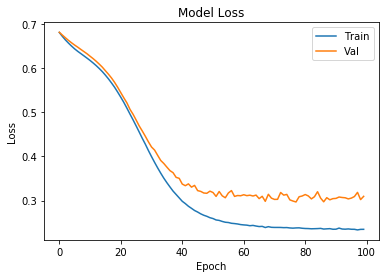

In [ ]:
# Visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')

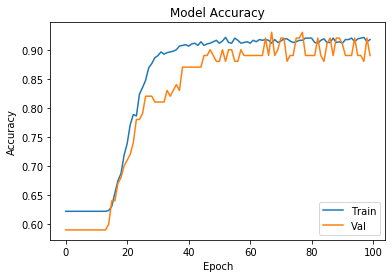

In [ ]:
# Visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')

In [ ]:
# serialize model to JSON
#model_json = model.to_json()
#with open("model.json", "w") as json_file:
#   json_file.write(model_json)
 
# serialize weights to HDF5
#model.save_weights("model.h5")
model.save("full.h5")
print("Saved model to disk")
from google.colab import files
#files.download("model.json")
#files.download("model.h5")
files.download("full.h5")

Saved model to disk
